# ObsID : 0945020132, SRCNUM : 7, Instru : EPN
**Simbad :** Quasar (COMBO J0333017-275819)
https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%40651085&Name=COMBO%20J0333017-275819&submit=submit

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]
Fit.statMethod = "cstat"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


In [6]:
spec = Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp_cstat.fits')[0])

Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12-**")


4 spectra  in use
 
Spectral Data File: ObsID0945020132_SRCNUM7_EMOS2_spectrum_grp_cstat.fits  Spectrum 4
Net count rate (cts/s) for Spectrum:4  3.772e-03 +/- 8.480e-04 (65.5 % total)
 Assigned to Data Group 1 and Plot Group 4
  Noticed Channels:  1-47
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 8682 sec
 Using fit statistic: cstat
 Using Background File                ObsID0945020132_SRCNUM7_EMOS2_background_spectrum.fits
  Background Exposure Time: 8682 sec
 Using Response (RMF) File            ObsID0945020132_SRCNUM7_EMOS2.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945020132_SRCNUM7_EMOS2.arf

     3 channels (1-3) ignored in spectrum #     4
    36 channels (12,47) ignored in spectrum #     4



(-0.5, 850.5, 652.5, -0.5)

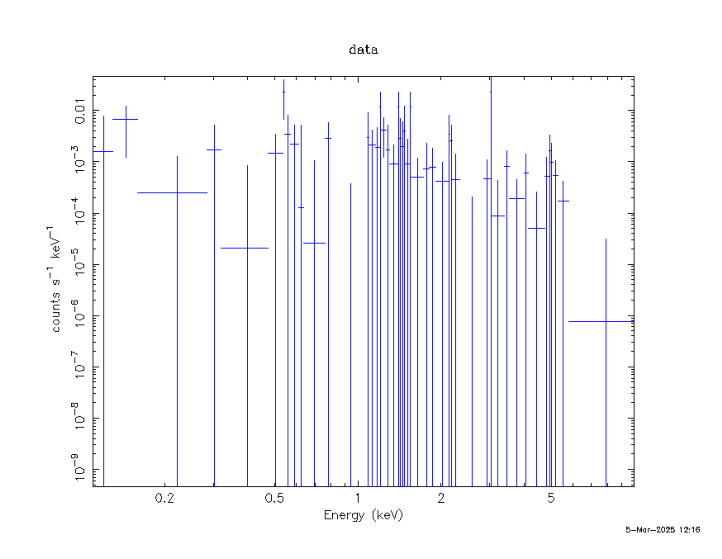

In [7]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum.png")[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [8]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic              8.438189e+06     using 47 bins, spe

(-0.5, 860.5, 661.5, -0.5)

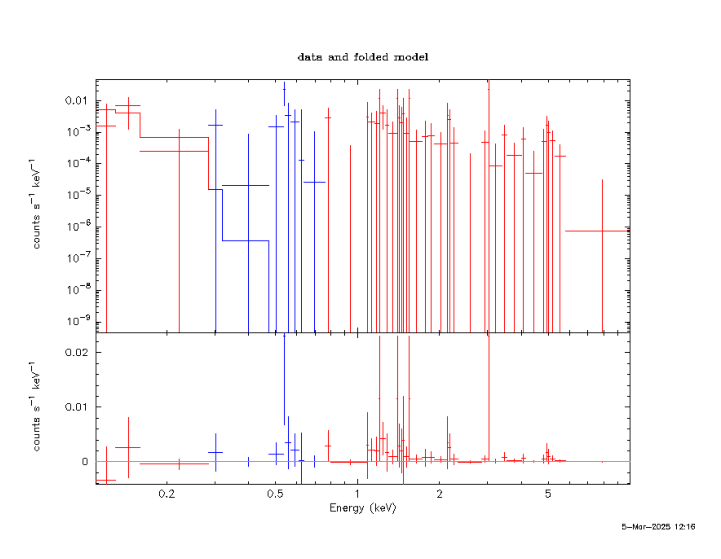

In [9]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bbody.png")[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [10]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              1.969463e+06     using 47 bins, spectrum 1.
                 C-Statistic              1.969463e+06     using 47 bins, spectrum 2.
                 C-Statistic                12886.58     using 8 bins, spectrum 3.
                 C-Statistic                12886.58     using 8 bins, spectrum 4.
Total fit statistic                       3.964700e+06     with 107 d.o.f.

Test statistic : Chi-Squared              8.961326e+10     using 110 bins.
 Null hypothesis probability of 0.000000e+00 with 107 degrees of freedom
 Current data and model no

(-0.5, 859.5, 661.5, -0.5)

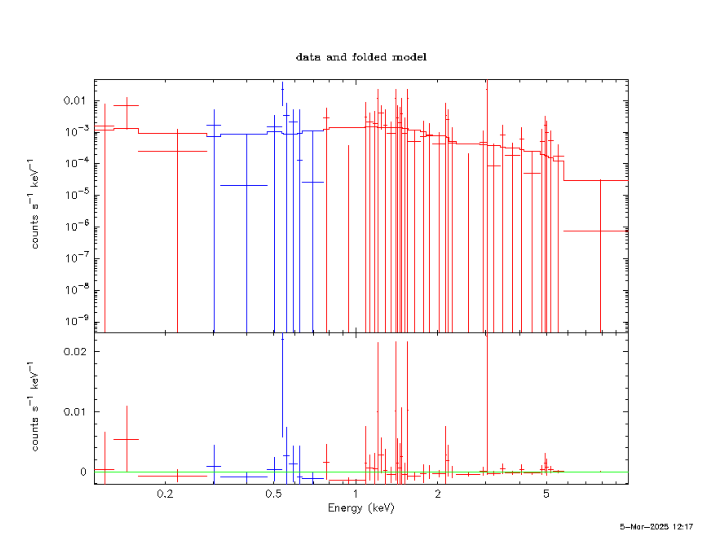

In [11]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_bremss.png")[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [12]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic                707438.4     using 47 bins, spectrum 1.
                 C-Statistic                707438.4     using 47 bins, spectrum 2.
                 C-Statistic                11573.71     using 8 bins, spectrum 3.
                 C-Statistic                11573.71     using 8 bins, spectrum 4.
Total fit statistic                       1.438024e+06     with 107 d.o.f.

Test statistic : Chi-Squ

(-0.5, 860.5, 662.5, -0.5)

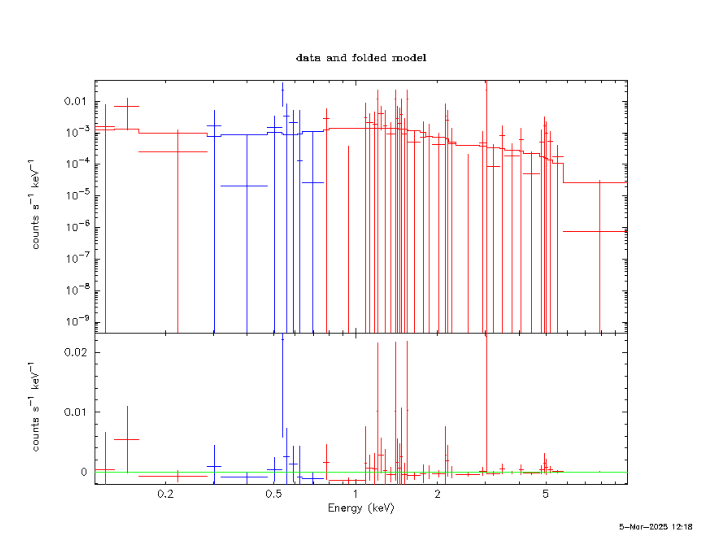

In [13]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_apec.png")[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [14]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic              4.819386e+06     using 47 bins, spectrum 1.
                 C-Statistic              4.819386e+06     using 47 bins, spectrum 2.
                 C-Statistic                23434.79     using 8 bins, spectrum 3.
                 C-Statistic                23434.79     using 8 bins, spectrum 4.
Total fit statistic                       9.685643e+06     with 107 d.o.f.

Test statistic : Chi-Squared              5.819756e+11     using 110 bins.
 Null hypothesis probability of 0.000000e+00 with 107 degrees of freedom
 Current data and model 

(-0.5, 857.5, 660.5, -0.5)

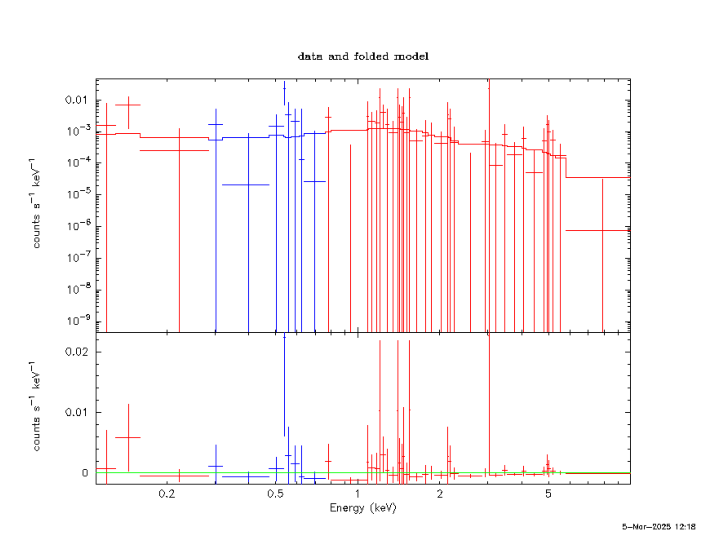

In [15]:
img = plt.imread(glob.glob("ObsID*SRCNUM*E*Spectrum_powerlaw.png")[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :** from ESASky

- RA = 53.2571070°
- Dec = -27.9719507°

53.26 -27.97

**Column density :** nH = 3*10^20 cm^-2

The different models give a column density of :

- bbody : nH = 4.49625*10^20
- bremss : nH = 3.35888*10^10
- apec : nH =  9.53252*10^4
- powerlaw : nH = 7.6225*10^13

bbody is the closest one.

## Flux

In [16]:
AllModels.calcFlux(".2 12.0")

Spectrum Number: 1, 2, 3, 4
Data Group Number: 1
 Model Flux 2.3875e-05 photons (1.1022e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [17]:
Flux = 1.1022e-13 # ergs/cm^2/s

### Luminosité

On ESASky, we observe optically that there are 2 very close sources, a blue one on which the EPIC cursor is placed and a yellow one. https://sky.esa.int/esasky/?target=53.2575%20-27.971638888888886&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

**Source bleue :** (most likely source)

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033301.7-275819
- IAU name : 4XMM J033301.6-275818
- RA : 03h 33m 01.706s
- DEC : -27° 58' 19.02"
- Flux : 7.916E-14 ergs/cm^2/s

``GAIA``
- Designation : Gaia DR3 5057482939190327168
- RA : 03h 33m 01.709s
- DEC : -27° 58' 18.91"
- Parallax : 2.4442 mas

In [18]:
"""GAIA"""

P_mas = 2.4442 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"Source bleue (GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

Source bleue (GAIA)
Distance : 1.2624580639882173e+21 cm
Luminosité : 2.207517688529204e+30 erg/s


**Source jaune :** (source la moins probable)

``GLADE``
- Numero : 1 689 423
- RA : 03h 33m 01.008s
- DEC : -27° 58' 08.72"
- DLC : 5124.4652 Mpc

``2MASS``
- Name : 03330155-2758115
- RA : 03h 33m 01.555s
- DEC : -27° 58' 11.52"

``GAIA``
- Designation : Gaia DR3 5057482943486276480
- RA : 03h 33m 01.560s
- DEC : -27° 58' 11.49"
- Parallax : 1.469 mas

In [19]:
"""GAIA"""

P_mas = 1.469 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"Source jaune (GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

Source jaune (GAIA)
Distance : 2.1005445881552078e+21 cm
Luminosité : 6.111306707388866e+30 erg/s


In [12]:
"""GLADE"""

d_kpc = 5124465.2 # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"Source jaune (GLADE)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

Source jaune (GLADE)
Distance : 1.581256226764e+28 cm
Luminosité : 4.984248486719782e+49 erg/s
